In [1]:
%%capture
!pip install pycaret==3.3.0

In [2]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

import json

import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

from pycaret.classification import *

In [3]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

PALETTE=['lightcoral', 'lightskyblue', 'gold', 'sandybrown', 'navajowhite',
        'khaki', 'lightslategrey', 'turquoise', 'rosybrown', 'thistle', 'pink']
sns.set_palette(PALETTE)
BACKCOLOR = '#f6f5f5'

from IPython.core.display import HTML

# Loading the Dataset

In [4]:
train_df=pd.read_csv("/kaggle/input/playground-series-s4e2/train.csv",index_col='id')
train_df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
id,,,,,,,,,,,,,,,,,
0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [5]:
test_df=pd.read_csv("/kaggle/input/playground-series-s4e2/test.csv",index_col='id')
test_df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
id,,,,,,,,,,,,,,,,
20758,Male,26.899886,1.848294,120.644178,yes,yes,2.938616,3.000000,Sometimes,no,2.825629,no,0.855400,0.000000,Sometimes,Public_Transportation
20759,Female,21.000000,1.600000,66.000000,yes,yes,2.000000,1.000000,Sometimes,no,3.000000,no,1.000000,0.000000,Sometimes,Public_Transportation
20760,Female,26.000000,1.643355,111.600553,yes,yes,3.000000,3.000000,Sometimes,no,2.621877,no,0.000000,0.250502,Sometimes,Public_Transportation
20761,Male,20.979254,1.553127,103.669116,yes,yes,2.000000,2.977909,Sometimes,no,2.786417,no,0.094851,0.000000,Sometimes,Public_Transportation
20762,Female,26.000000,1.627396,104.835346,yes,yes,3.000000,3.000000,Sometimes,no,2.653531,no,0.000000,0.741069,Sometimes,Public_Transportation


In [6]:
train_df.dropna(subset=['NObeyesdad'],inplace=True)
print(train_df.shape)
print(train_df.dtypes)

(20758, 17)
Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object


In [7]:
print(test_df.dtypes)

Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
dtype: object


# Setting up the environment

In [8]:
s = setup(train_df,target='NObeyesdad',experiment_name='obesity_prediction',session_id=42)

,Description,Value
0,Session id,42
1,Target,NObeyesdad
2,Target type,Multiclass
3,Target mapping,"Insufficient_Weight: 0, Normal_Weight: 1, Obesity_Type_I: 2, Obesity_Type_II: 3, Obesity_Type_III: 4, Overweight_Level_I: 5, Overweight_Level_II: 6"
4,Original data shape,"(20758, 17)"
5,Transformed data shape,"(20758, 26)"
6,Transformed train set shape,"(14530, 26)"
7,Transformed test set shape,"(6228, 26)"
8,Numeric features,8
9,Categorical features,8


In [9]:
best=compare_models(n_select=1)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.9032,0.0000,0.9032,0.9033,0.9030,0.8864,0.8865,14.1830
xgboost,Extreme Gradient Boosting,0.9030,0.0000,0.9030,0.9030,0.9027,0.8862,0.8863,3.4380
lightgbm,Light Gradient Boosting Machine,0.9023,0.0000,0.9023,0.9023,0.9021,0.8854,0.8854,2.1200
gbc,Gradient Boosting Classifier,0.9010,0.0000,0.9010,0.9010,0.9007,0.8838,0.8839,15.5120
rf,Random Forest Classifier,0.8911,0.0000,0.8911,0.8912,0.8905,0.8722,0.8724,2.2080
et,Extra Trees Classifier,0.8636,0.0000,0.8636,0.8639,0.8631,0.8399,0.8401,1.9770
dt,Decision Tree Classifier,0.8422,0.0000,0.8422,0.8426,0.8421,0.8149,0.8150,0.3840
knn,K Neighbors Classifier,0.8394,0.0000,0.8394,0.8384,0.8382,0.8117,0.8119,0.3670
lr,Logistic Regression,0.8274,0.0000,0.8274,0.8237,0.8246,0.7974,0.7977,1.7350
lda,Linear Discriminant Analysis,0.8195,0.0000,0.8195,0.8183,0.8179,0.7883,0.7887,0.2960


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [10]:
finalized_model=finalize_model(best)

# Model Predictions and Visualization

In [11]:
predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.9057,0.9908,0.9057,0.9051,0.9053,0.8895,0.8895


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,prediction_label,prediction_score
id,,,,,,,,,,,,,,,,,,,
2257,Female,25.816444,1.668649,104.754959,yes,yes,3.0,3.000000,Sometimes,no,1.290979,no,0.162083,0.766668,Sometimes,Public_Transportation,Obesity_Type_III,Obesity_Type_III,0.9970
15108,Female,17.000000,1.700000,50.000000,no,no,2.0,3.000000,Frequently,no,2.000000,no,3.000000,1.000000,Sometimes,Public_Transportation,Insufficient_Weight,Insufficient_Weight,0.9463
4094,Male,20.206358,1.800000,104.772163,yes,yes,2.0,1.000000,Sometimes,no,3.000000,no,0.210351,1.742880,no,Public_Transportation,Obesity_Type_I,Obesity_Type_I,0.9874
7165,Female,18.000000,1.710000,50.000000,no,yes,2.0,3.000000,Frequently,no,1.000000,no,1.000000,1.000000,Sometimes,Public_Transportation,Insufficient_Weight,Insufficient_Weight,0.9550
548,Male,34.288250,1.836669,99.000000,yes,yes,2.0,1.867836,Sometimes,no,2.000000,no,1.000000,0.000000,no,Automobile,Overweight_Level_II,Overweight_Level_II,0.8506
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11365,Female,38.000000,1.750000,78.000000,yes,no,2.0,3.000000,Sometimes,no,3.000000,no,0.000000,0.000000,Sometimes,Automobile,Obesity_Type_I,Overweight_Level_II,0.4959
17984,Female,39.000000,1.550000,62.000000,no,yes,3.0,3.000000,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Automobile,Overweight_Level_I,Overweight_Level_I,0.9185
12577,Female,26.000000,1.641132,111.946655,yes,yes,3.0,3.000000,Sometimes,no,2.720050,no,0.000000,0.088236,Sometimes,Public_Transportation,Obesity_Type_III,Obesity_Type_III,0.9989


In [12]:
predict_model(finalized_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.9573,0.9981,0.9573,0.9572,0.9571,0.9499,0.9499


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,prediction_label,prediction_score
id,,,,,,,,,,,,,,,,,,,
2257,Female,25.816444,1.668649,104.754959,yes,yes,3.0,3.000000,Sometimes,no,1.290979,no,0.162083,0.766668,Sometimes,Public_Transportation,Obesity_Type_III,Obesity_Type_III,0.9977
15108,Female,17.000000,1.700000,50.000000,no,no,2.0,3.000000,Frequently,no,2.000000,no,3.000000,1.000000,Sometimes,Public_Transportation,Insufficient_Weight,Insufficient_Weight,0.9726
4094,Male,20.206358,1.800000,104.772163,yes,yes,2.0,1.000000,Sometimes,no,3.000000,no,0.210351,1.742880,no,Public_Transportation,Obesity_Type_I,Obesity_Type_I,0.9931
7165,Female,18.000000,1.710000,50.000000,no,yes,2.0,3.000000,Frequently,no,1.000000,no,1.000000,1.000000,Sometimes,Public_Transportation,Insufficient_Weight,Insufficient_Weight,0.9634
548,Male,34.288250,1.836669,99.000000,yes,yes,2.0,1.867836,Sometimes,no,2.000000,no,1.000000,0.000000,no,Automobile,Overweight_Level_II,Overweight_Level_II,0.9351
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11365,Female,38.000000,1.750000,78.000000,yes,no,2.0,3.000000,Sometimes,no,3.000000,no,0.000000,0.000000,Sometimes,Automobile,Obesity_Type_I,Obesity_Type_I,0.7026
17984,Female,39.000000,1.550000,62.000000,no,yes,3.0,3.000000,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Automobile,Overweight_Level_I,Overweight_Level_I,0.8319
12577,Female,26.000000,1.641132,111.946655,yes,yes,3.0,3.000000,Sometimes,no,2.720050,no,0.000000,0.088236,Sometimes,Public_Transportation,Obesity_Type_III,Obesity_Type_III,0.9988


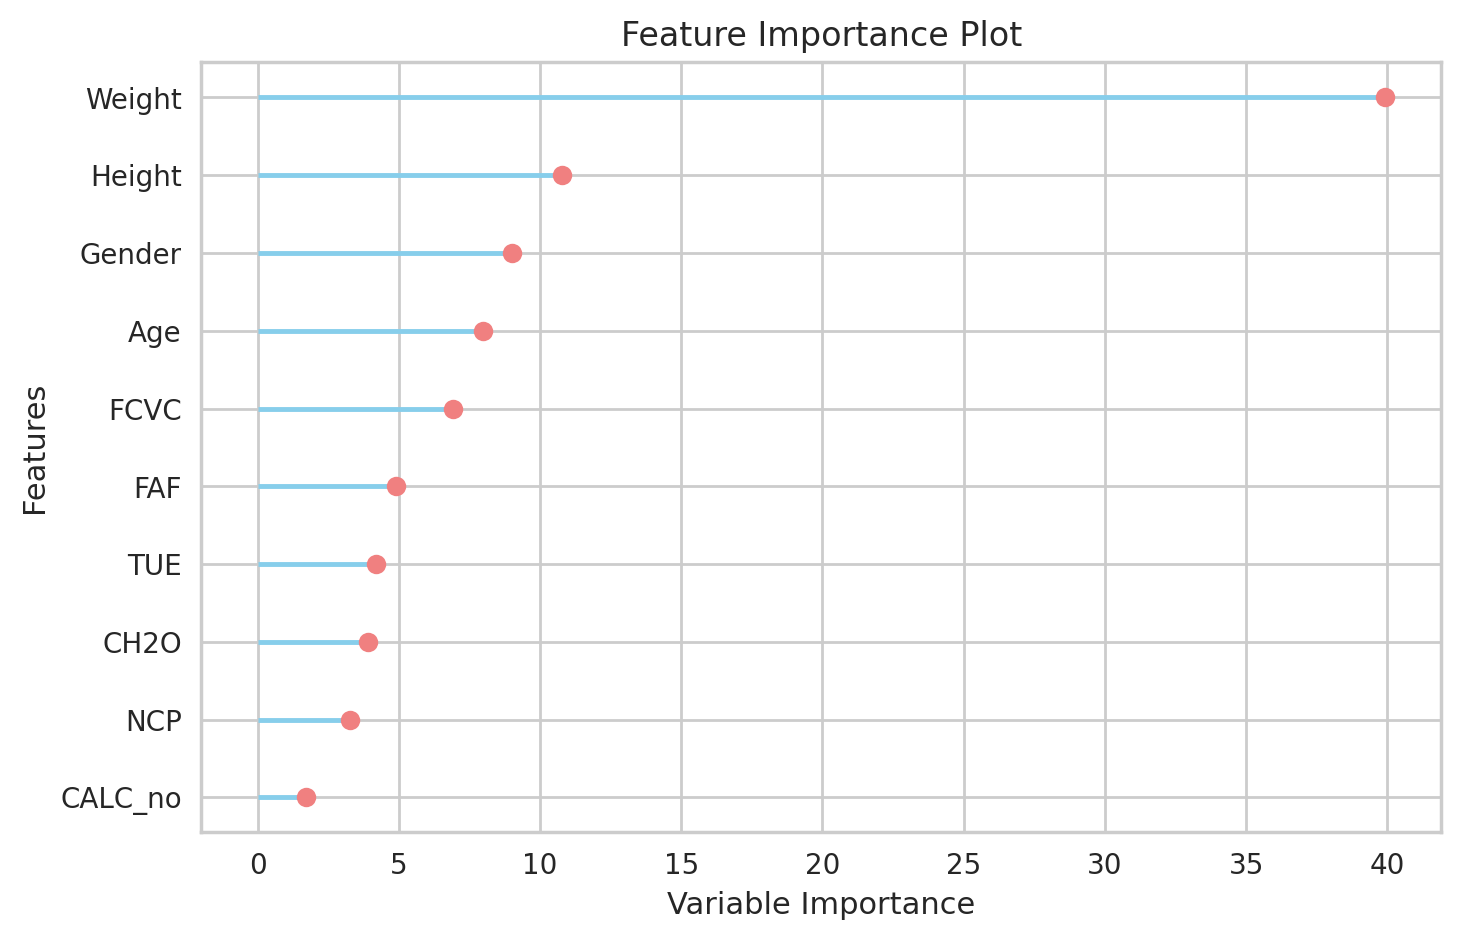

In [13]:
plot_model(finalized_model,plot='feature')

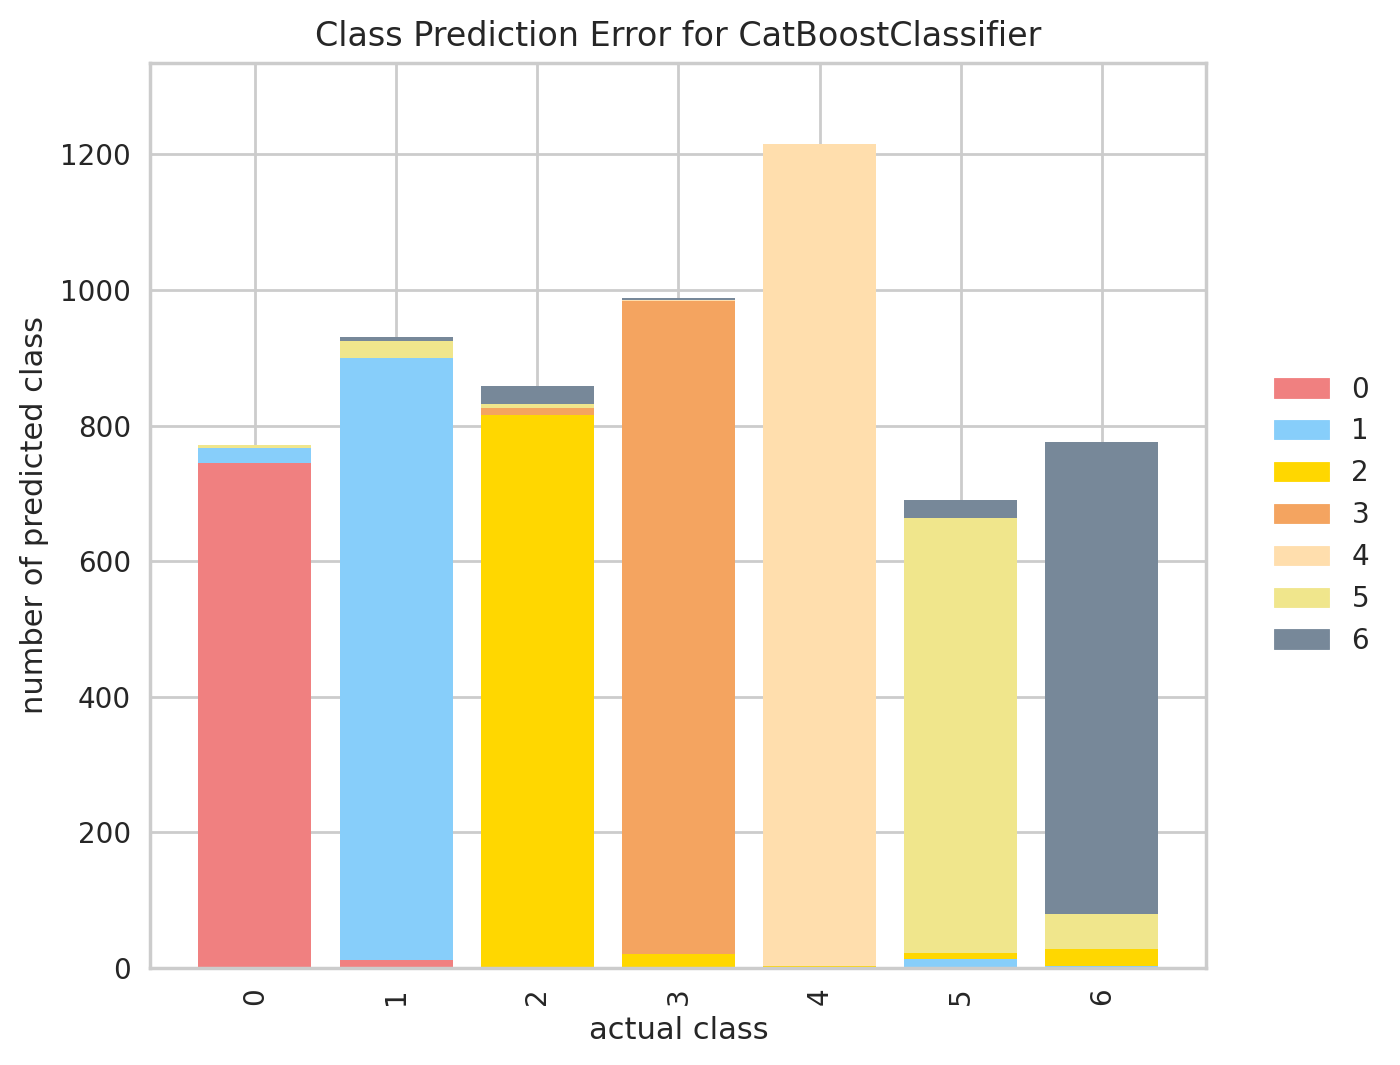

In [14]:
plot_model(finalized_model,plot='error')

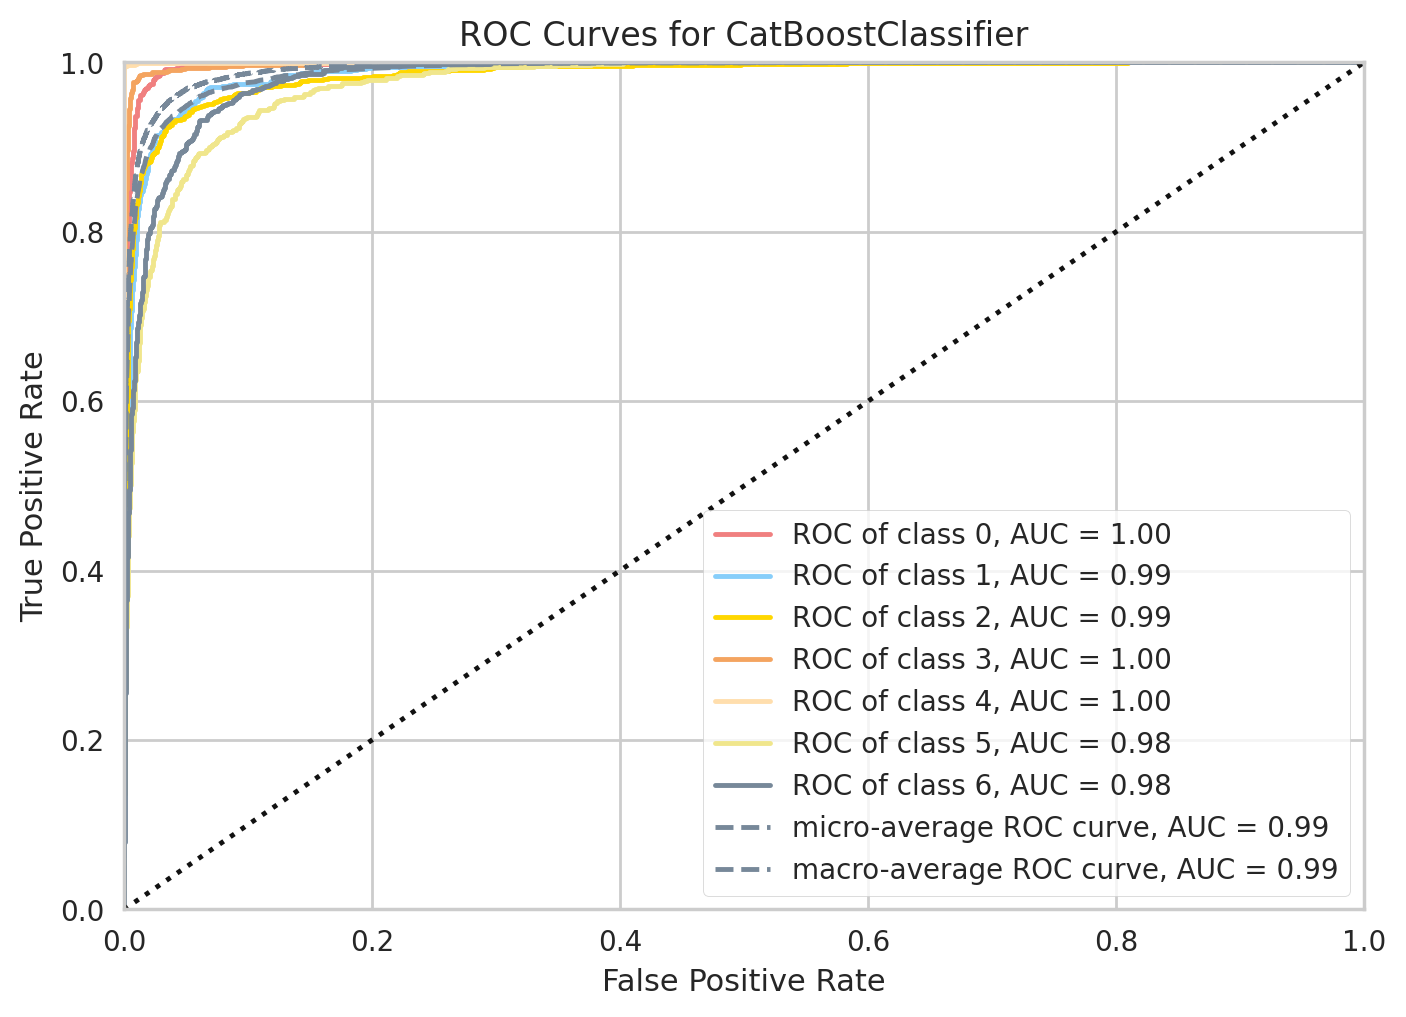

In [15]:
plot_model(best,plot='auc')

# Making Predictions

In [16]:
predictions_df=predict_model(finalized_model,data=test_df,raw_score=True)
print(predictions_df.shape)
predictions_df.head(3)

(13840, 24)


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,...,CALC,MTRANS,prediction_label,prediction_score_Insufficient_Weight,prediction_score_Normal_Weight,prediction_score_Obesity_Type_I,prediction_score_Obesity_Type_II,prediction_score_Obesity_Type_III,prediction_score_Overweight_Level_I,prediction_score_Overweight_Level_II
id,,,,,,,,,,,,,,,,,,,,,
20758,Male,26.899885,1.848294,120.644180,yes,yes,2.938616,3.0,Sometimes,no,...,Sometimes,Public_Transportation,Obesity_Type_II,0.0,0.0000,0.0020,0.9977,0.0000,0.000,0.0002
20759,Female,21.000000,1.600000,66.000000,yes,yes,2.000000,1.0,Sometimes,no,...,Sometimes,Public_Transportation,Overweight_Level_I,0.0,0.0112,0.0211,0.0000,0.0000,0.952,0.0156
20760,Female,26.000000,1.643355,111.600555,yes,yes,3.000000,3.0,Sometimes,no,...,Sometimes,Public_Transportation,Obesity_Type_III,0.0,0.0000,0.0015,0.0000,0.9985,0.000,0.0000


In [17]:
submission_df=pd.DataFrame({'id':test_df.index,'NObeyesdad':predictions_df['prediction_label']})
submission_df.to_csv("submission.csv",index=False)
print(submission_df.shape)
submission_df.head(5)

(13840, 2)


,id,NObeyesdad
id,,
20758,20758,Obesity_Type_II
20759,20759,Overweight_Level_I
20760,20760,Obesity_Type_III
20761,20761,Obesity_Type_I
20762,20762,Obesity_Type_III


**Credit:**
https://www.kaggle.com/code/muzammilbaloch/automl-and-obesity-risk-outcomes